# Assignment
In this assignment, you need to train regression models on Beijing PM2.5 dataset in winter of 2014.
1. You have to implement
    - a Linear(Polynomial) regressor
    - a Random Forest regressor
2. You need to show a residual plot for each of your model on both training data and testing data.
3. $R^2$  score need to be larger than 0.72 on testing data.

In [3]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [5]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

# Random Forest Regressor

In [58]:
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))


C:\Users\Che\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R^2 train: 0.99, test: 0.90


## Residual Plot

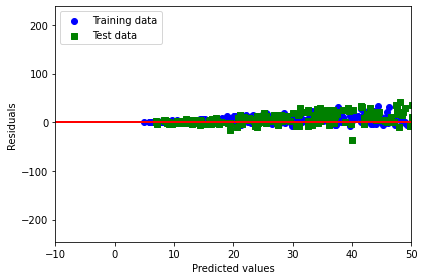

In [11]:
plt.scatter(
    y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

# Linear Regressor

In [23]:
for d in range(1, 10):
    polynomial = PolynomialFeatures(degree=d)
    X_poly = polynomial.fit_transform(X)
    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)

    poly_regr = LinearRegression()
    poly_regr.fit(X_poly_train, y_poly_train)
    print(f'[Degree: {d}]')
    print(f'\tR^2 train: {r2_score(y_poly_train, poly_regr.predict(X_poly_train)):.2f}, '\
          f'test: {r2_score(y_poly_test, poly_regr.predict(X_poly_test)):.2f}')

[Degree: 1]
	R^2 train: 0.48, test: 0.44
[Degree: 2]
	R^2 train: 0.66, test: -1.18
[Degree: 3]
	R^2 train: 0.74, test: -10.69
[Degree: 4]
	R^2 train: 0.86, test: -14.33
[Degree: 5]
	R^2 train: 0.88, test: -5.64
[Degree: 6]
	R^2 train: 0.88, test: -10.23
[Degree: 7]
	R^2 train: 0.87, test: -5.52
[Degree: 8]
	R^2 train: 0.88, test: -4.09
[Degree: 9]
	R^2 train: 0.86, test: -4.40


## Feature Selection
Select top-3 features to improve linear regressor.

 1) DEWP                           0.460799
 2) No                             0.233257
 3) day                            0.130054
 4) PRES                           0.052546
 5) Iws                            0.050156
 6) TEMP                           0.032446
 7) hour                           0.029527
 8) month                          0.008861
 9) year                           0.001695
10) Is                             0.000422
11) Ir                             0.000238


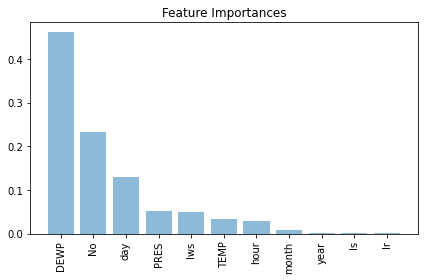

In [59]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

## Remodel linear regressor

In [55]:
# Obviously, 'No' must has no relation with PM2.5
X_sel = X.drop(columns=X.columns[indices[4:]]).drop(columns=['No'])

print("Linear(Polynomial) regressor:")
for d in range(9, 10):
    polynomial = PolynomialFeatures(degree=d)
    X_poly = polynomial.fit_transform(X_sel)
    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=3)

    poly_regr = LinearRegression()
    poly_regr.fit(X_poly_train, y_poly_train)
    y_poly_train_pred = poly_regr.predict(X_poly_train)
    y_poly_test_pred = poly_regr.predict(X_poly_test)
    print(f'[Degree: {d}]')
    print(f'\tR^2 train: {r2_score(y_poly_train, y_poly_train_pred):.2f}, '\
          f'test: {r2_score(y_poly_test, y_poly_test_pred):.2f}')

Linear(Polynomial) regressor:
[Degree: 9]
	R^2 train: 0.70, test: 0.72


## Residual plot of linear regressor

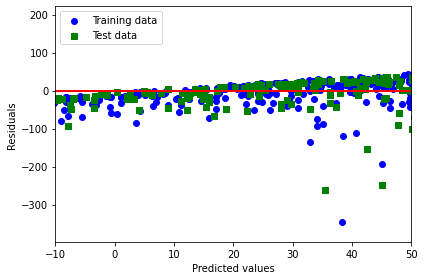

In [57]:
plt.scatter(
    y_poly_train_pred, y_poly_train_pred - y_poly_train, c='blue', marker='o', label='Training data')
plt.scatter(
    y_poly_test_pred, y_poly_test_pred - y_poly_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()